PART1

In [21]:
#installing all libraries
#install.packages("readr")
#install.packages("lubridate")
#install.packages("ggplot2")
#install.packages("fpp2")
#install.packages("corrplot")
#install.packages("caret")
#install.packages("class")
#install.packages("caTools")
#install.packages("party")
#install.packages("PRROC")

In [22]:
#loading all libraries
library(readr)
library(lubridate)
library(ggplot2)
library(fpp2)
library(forecast)
library(caret)
library(tidyverse)
library(dplyr)
library(tseries)
library(corrplot)
library(rpart)
library(class)
library(caTools)
library(party)
library(PRROC)
library(pROC)

Loading required package: lattice

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ purrr   0.3.5      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ purrr::lift()            masks caret::lift()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()

corrplot 0.92 loaded

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘

In [23]:
#loading data
df <- read_csv("/content/Departure.csv")
colnames(df) <- c("Date", "departures")
head(df)

Rows: 153 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Month
dbl (1): departures '000

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,departures
<chr>,<dbl>
2010 January,732.4
2010 February,757.2
2010 March,919.6
2010 April,709.5
2010 May,977.9
2010 June,1183.1


In [24]:
#changing datatype to datetime format
df$Date = ym(df$Date) 
head(df)

Date,departures
<date>,<dbl>
2010-01-01,732.4
2010-02-01,757.2
2010-03-01,919.6
2010-04-01,709.5
2010-05-01,977.9
2010-06-01,1183.1


In [25]:
#departures are in thousand 
df$departures = df$departures * 1000
head(df)

Date,departures
<date>,<dbl>
2010-01-01,732400
2010-02-01,757200
2010-03-01,919600
2010-04-01,709500
2010-05-01,977900
2010-06-01,1183100


In [26]:
#checking for null values
sum(is.na(df))

[1] 0

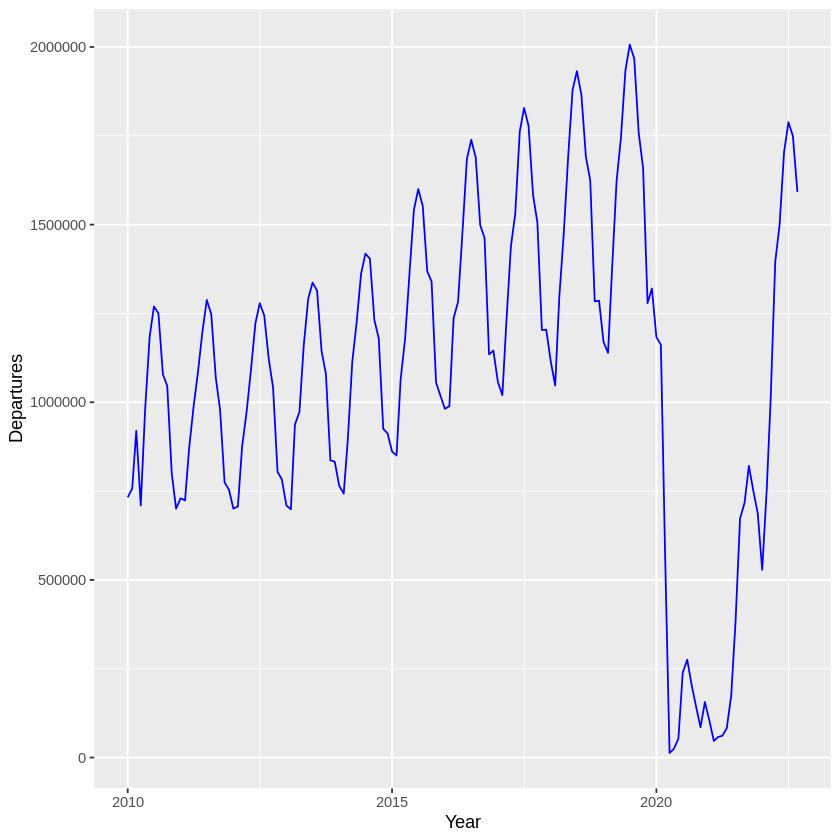

In [27]:
#line plot of departures
ggplot(data = df, aes(x=Date, y=departures)) + geom_line(col='blue') + scale_x_date('Year')  + ylab("Departures") 

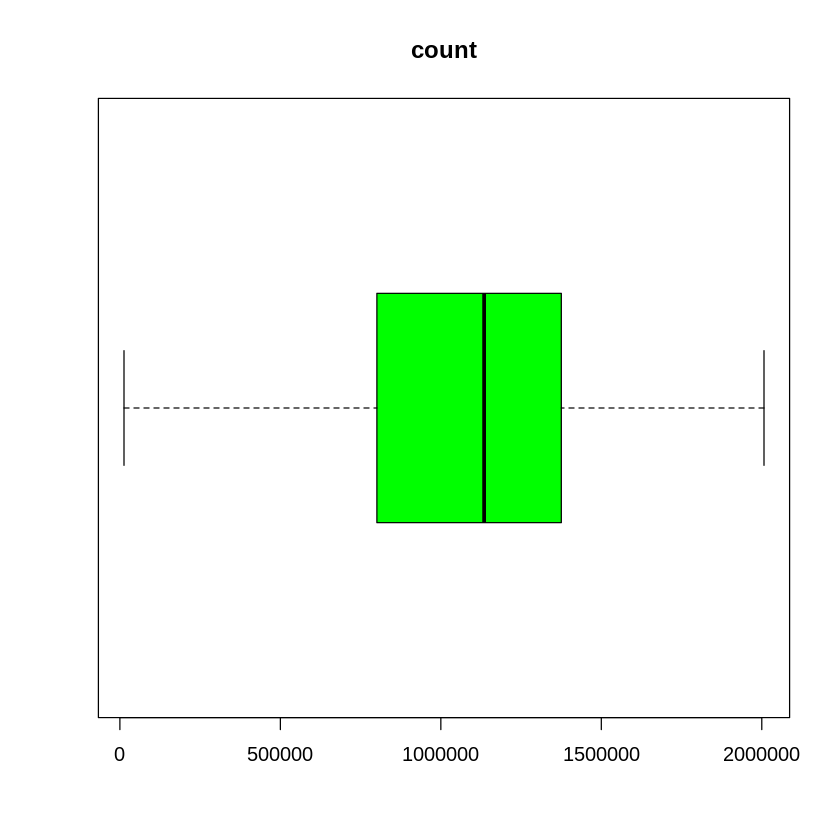

In [28]:
#departures value distribution
boxplot(df$departures,main="count",col='green',horizontal=TRUE)

In [29]:
#formatting to time series
df1 <- ts(df[-1],start = c(2010, 1), end = c(2020,12), frequency = 12)

In [30]:
df1

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,732400,757200,919600,709500,977900,1183100,1269500,1250500,1078700,1045800,800700,700500
2011,729600,724000,869600,987900,1084200,1198500,1288000,1247800,1070300,978700,774300,754300
2012,700500,706900,874800,972600,1089600,1222300,1278800,1244200,1122100,1041300,804100,782400
2013,709500,698700,937300,972300,1160200,1292100,1336700,1314300,1144200,1079900,836500,832700
2014,764700,742800,892500,1112700,1223800,1361800,1418400,1403900,1231200,1179900,925400,912300
2015,861500,850300,1063400,1178500,1359900,1541700,1600000,1552500,1368800,1339800,1055400,1018600
2016,981700,989000,1236500,1282800,1475700,1684600,1738700,1688900,1498600,1462300,1134900,1145300
2017,1057100,1020200,1227700,1438700,1530600,1761500,1828600,1778100,1583600,1505900,1203500,1204300
2018,1115600,1047300,1294600,1473800,1687400,1879000,1932000,1865200,1691000,1624900,1284000,1285700
2019,1169300,1139100,1375400,1622600,1744000,1933400,2006900,1967500,1757400,1660100,1279100,1320200


[1] 2010    1

[1] 2020   12

[1] 12

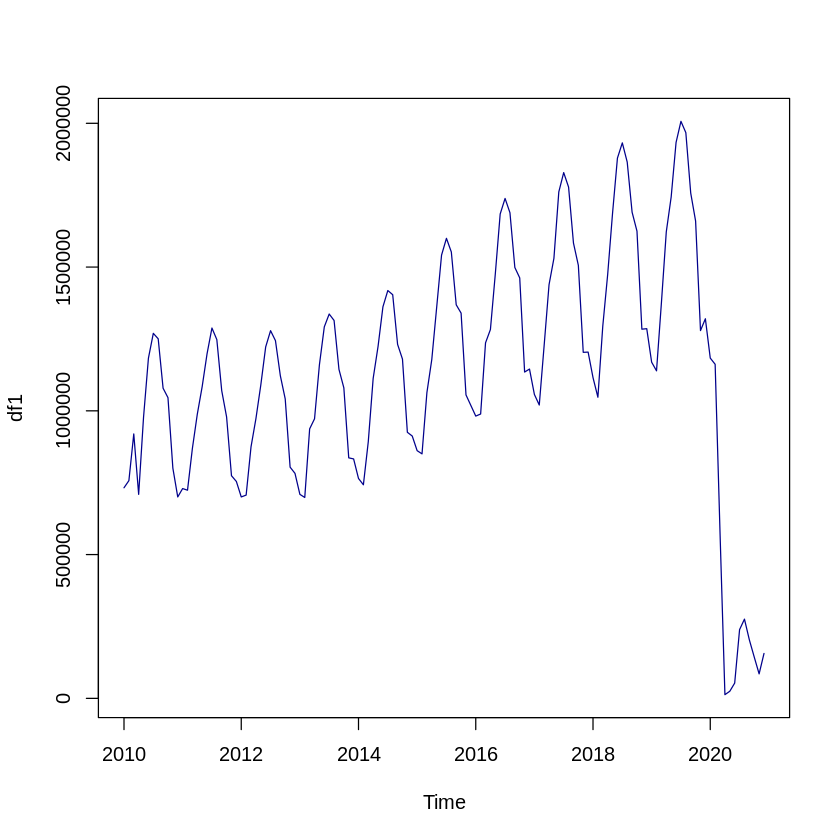

In [31]:
plot(df1, col = "darkblue")
start(df1)
end(df1)
frequency(df1)

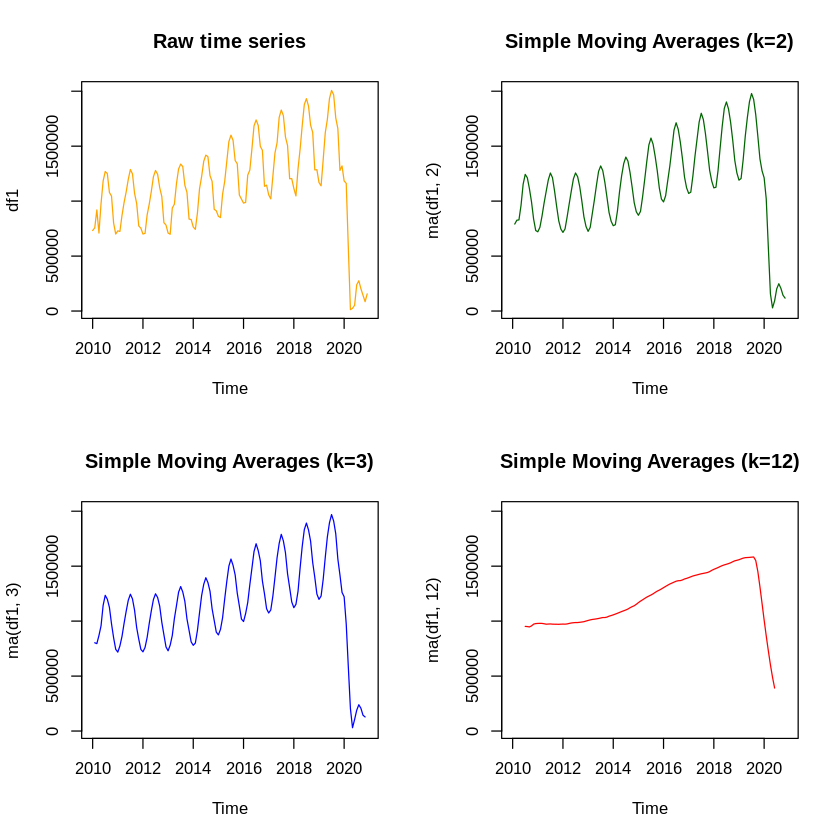

In [32]:
#plot of moving average with different k values
opar <- par(no.readonly =TRUE) 
par(mfrow = c(2,2))
ylim <- c(min(df1), max(df1)) 
plot(df1, main = "Raw time series", col = "orange")
plot(ma(df1, 2), main = "Simple Moving Averages (k=2)", ylim = ylim, col = "dark green") 
plot(ma(df1, 3), main = "Simple Moving Averages (k=3)", ylim = ylim, col = "blue") 
plot(ma(df1, 12), main = "Simple Moving Averages (k=12)", ylim = ylim, col = "red") 
par(opar)

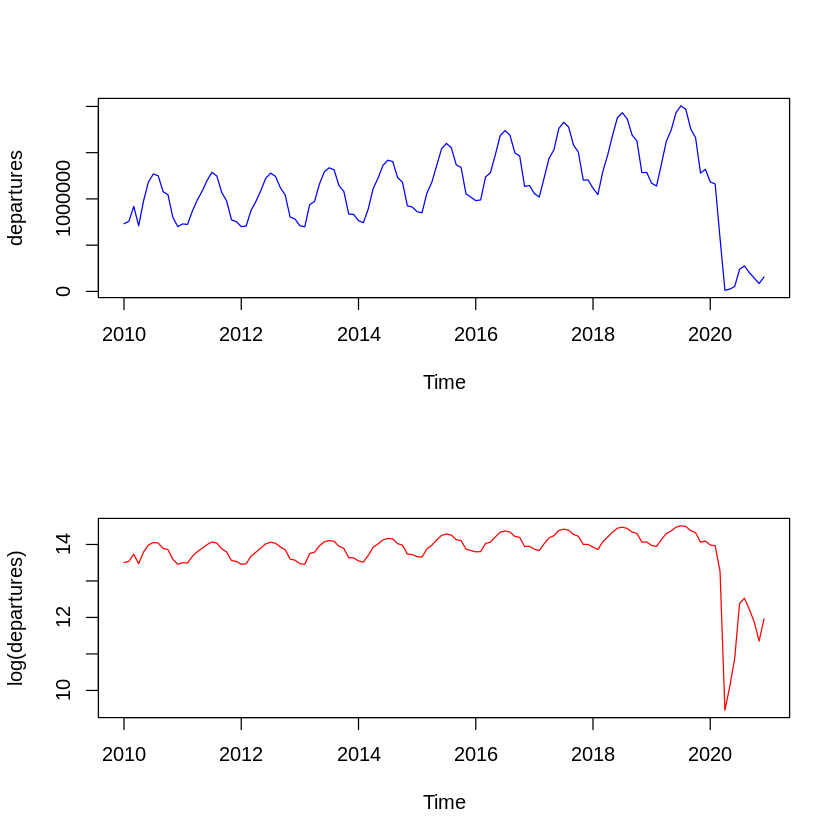

In [33]:
par(mfrow = c(2,1))
plot(df1, ylab="departures", col='Blue')
lagdf1 <- log(df1)
plot(lagdf1, ylab="log(departures)", col='red')

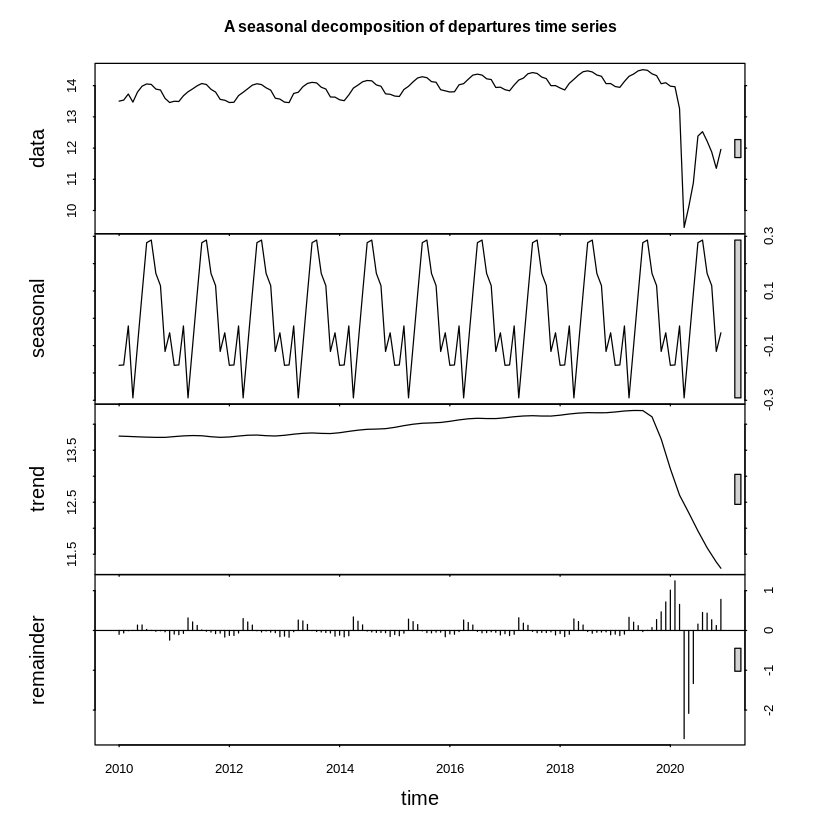

In [34]:
fit <- stl(lagdf1, s.window="period")
plot(fit, main="A seasonal decomposition of departures time series")

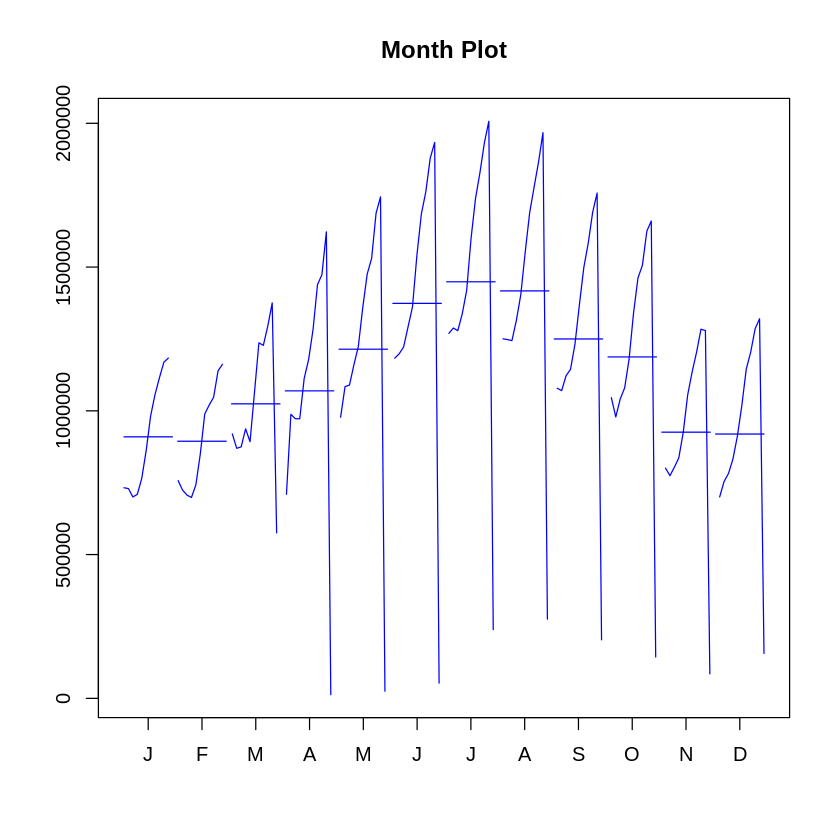

In [35]:
monthplot(df1, xlab="", ylab="", main="Month Plot", col = "blue")

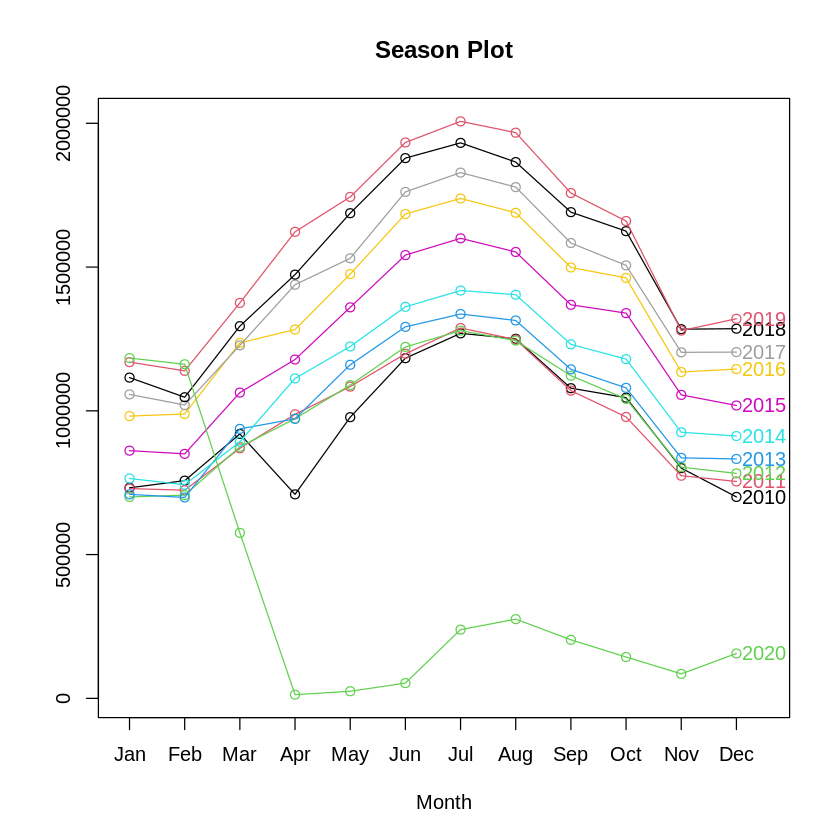

In [36]:
seasonplot(df1, year.labels="TRUE", main="Season Plot", col = 1:11)

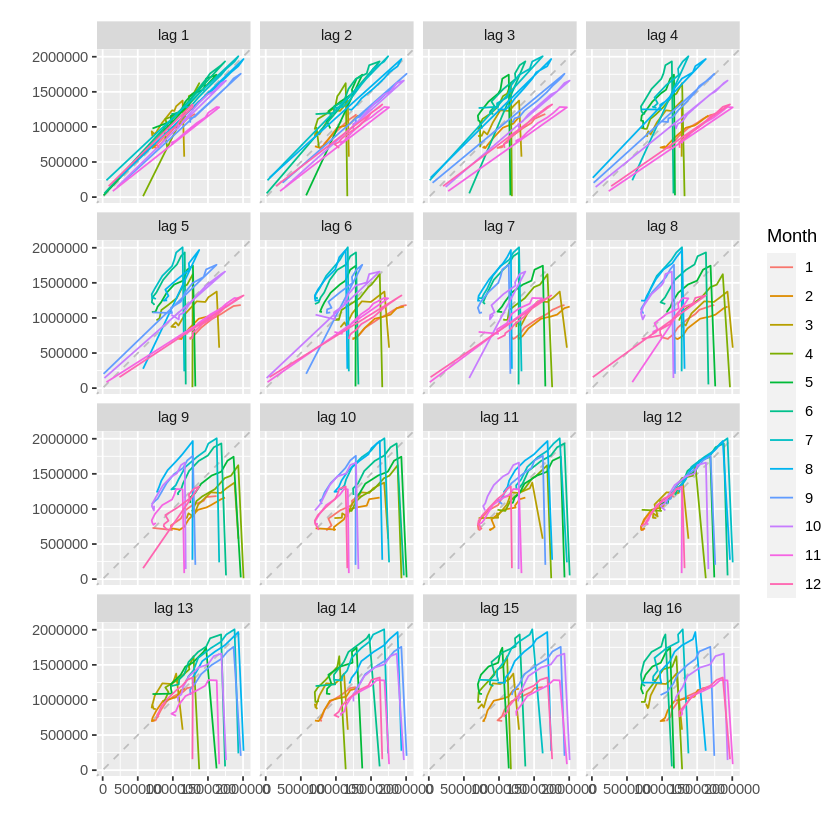

In [37]:
gglagplot(df1)

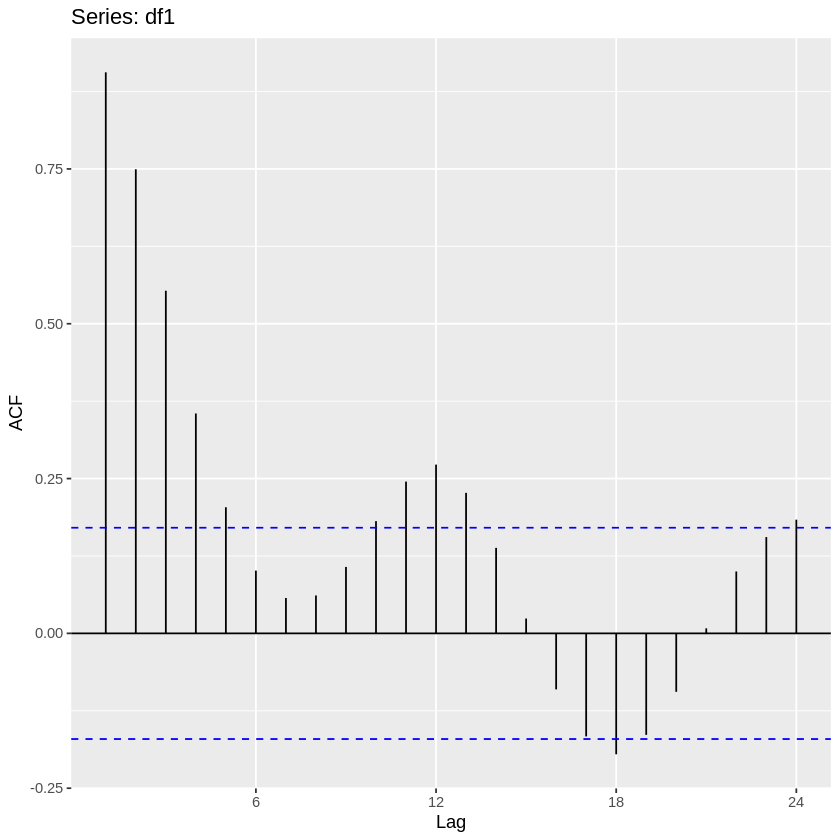

In [38]:
ggAcf(df1)

Exponential forecasting models

In [39]:
etsmodel <- ets(df1) # Fits the model
summary(etsmodel)

ETS(A,Ad,A) 

Call:
 ets(y = df1) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.1413 
    gamma = 1e-04 
    phi   = 0.8 

  Initial states:
    l = 962608.964 
    b = 4628.2885 
    s = -208286.8 -202806.8 72388.51 130782.5 307735.4 349771
           233346.4 73306.34 -65974 -144109.5 -278538.5 -267614.6

  sigma:  107768.1

     AIC     AICc      BIC 
3721.494 3727.547 3773.384 

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set -2423.236 100589.4 52832.03 -30.06124 41.13627 0.2738842 0.2759804

In [40]:
#prediction
pred1 <- forecast(etsmodel,6)

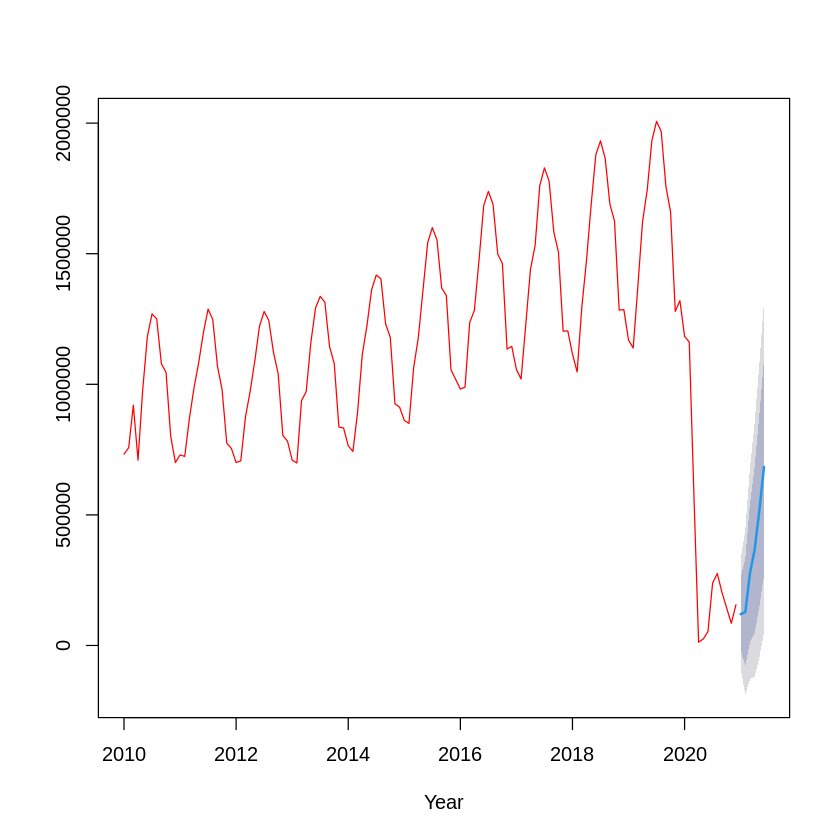

In [41]:
#forecasting prediction
plot(forecast(etsmodel, 5),xlab = "Year",  main="",col = 'red')

In [42]:
#performance evaluaution
accuracy(etsmodel)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-2423.236,100589.4,52832.03,-30.06124,41.13627,0.2738842,0.2759804



	Ljung-Box test

data:  Residuals from ETS(A,Ad,A)
Q* = 22.867, df = 7, p-value = 0.001798

Model df: 17.   Total lags used: 24



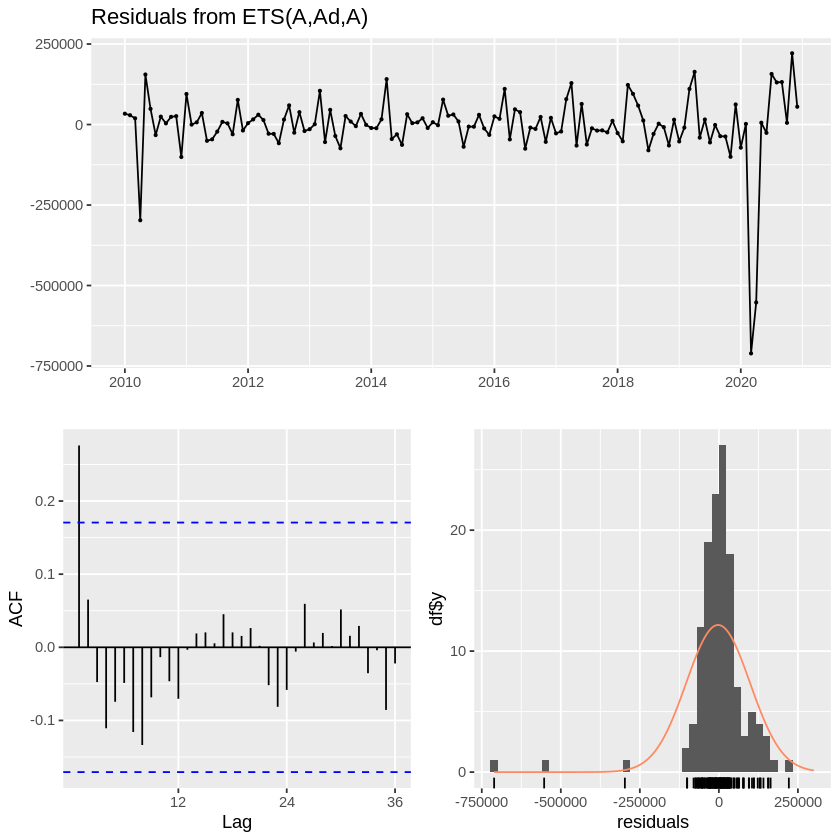

In [43]:
checkresiduals(etsmodel)

Arima Forecasting Model

In [44]:
#data is not stationary
adf.test(df1, alternative = "stationary")


	Augmented Dickey-Fuller Test

data:  df1
Dickey-Fuller = -1.5447, Lag order = 5, p-value = 0.7658
alternative hypothesis: stationary


In [45]:
#arima model
arimamodel = auto.arima(df1,seasonal=FALSE)


In [46]:
summary(arimamodel)

Series: df1 
ARIMA(0,1,3) 

Coefficients:
         ma1     ma2     ma3
      0.3782  0.5027  0.2286
s.e.  0.0899  0.0904  0.0929

sigma^2 = 1.878e+10:  log likelihood = -1734.16
AIC=3476.32   AICc=3476.63   BIC=3487.82

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -1786.819 134956.4 100241.2 -4.110509 43.44823 0.5196559
                    ACF1
Training set -0.01375356

In [47]:
#prediction
pred2 = forecast(arimamodel, 6)
pred2

         Point Forecast       Lo 80     Hi 80     Lo 95     Hi 95
Jan 2021       183045.1    7409.883  358680.4  -85565.8  451656.1
Feb 2021       216266.8  -82796.993  515330.7 -241111.8  673645.5
Mar 2021       232901.0 -212713.898  678515.8 -448608.2  914410.1
Apr 2021       232901.0 -346623.211  812425.1 -653404.8 1119206.7
May 2021       232901.0 -454939.085  920741.0 -819059.6 1284861.5
Jun 2021       232901.0 -548379.778 1014181.7 -961964.8 1427766.7

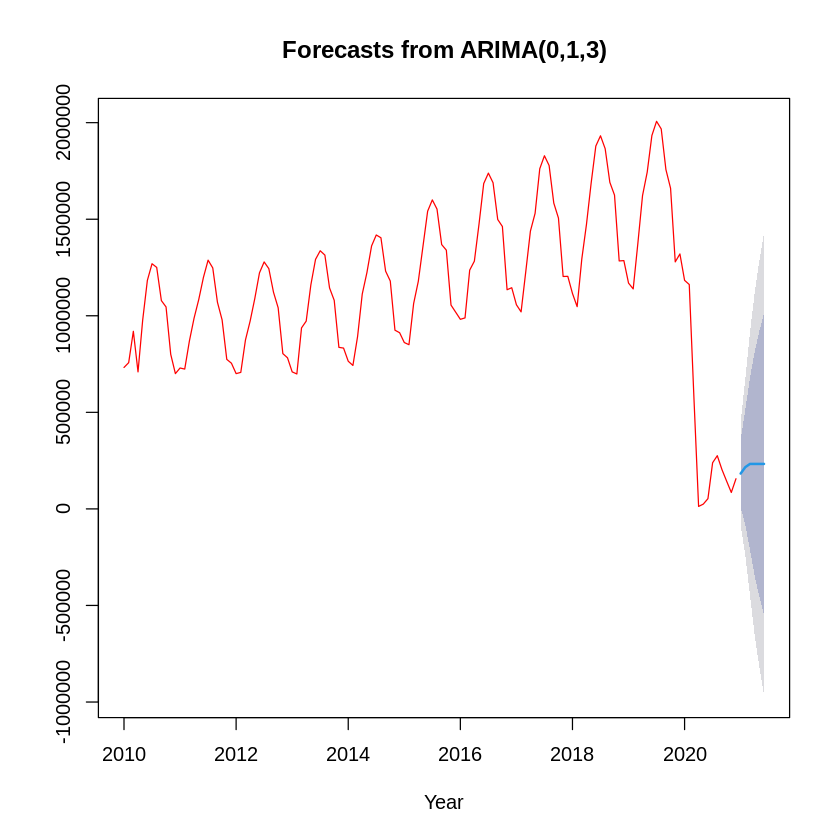

In [48]:
plot(forecast(arimamodel, 6), xlab="Year", col="red")


	Box-Ljung test

data:  arimamodel$residuals
X-squared = 0.025541, df = 1, p-value = 0.873


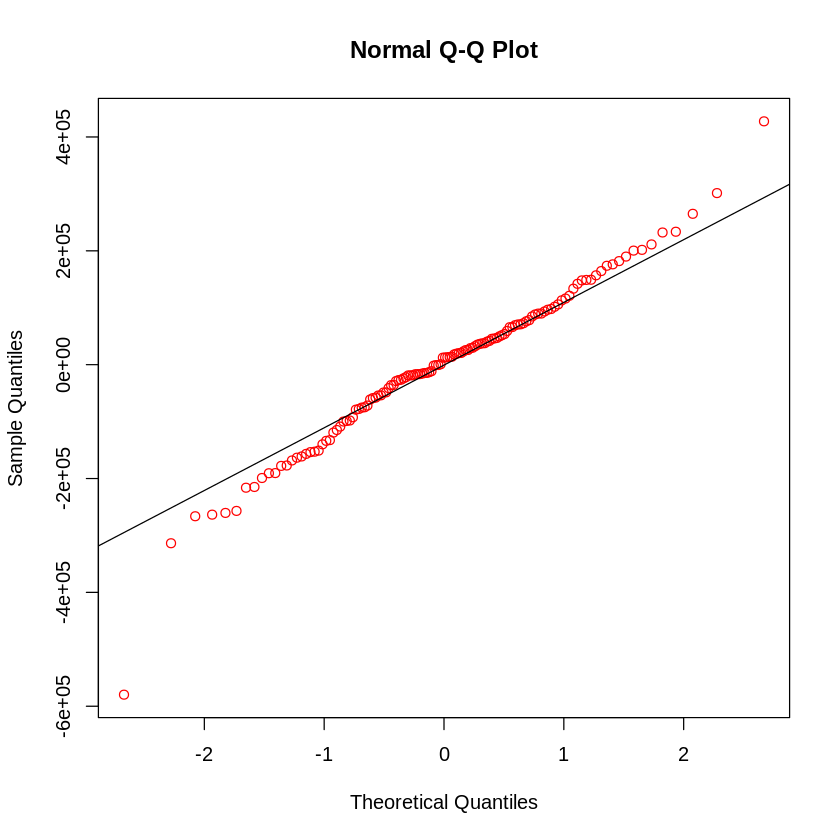

In [49]:
# EVALUATION OF MODEL
qqnorm(arimamodel$residuals, col="red")
qqline(arimamodel$residuals)
Box.test(arimamodel$residuals, type="Ljung-Box")


	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)
Q* = 95.318, df = 21, p-value = 1.922e-11

Model df: 3.   Total lags used: 24



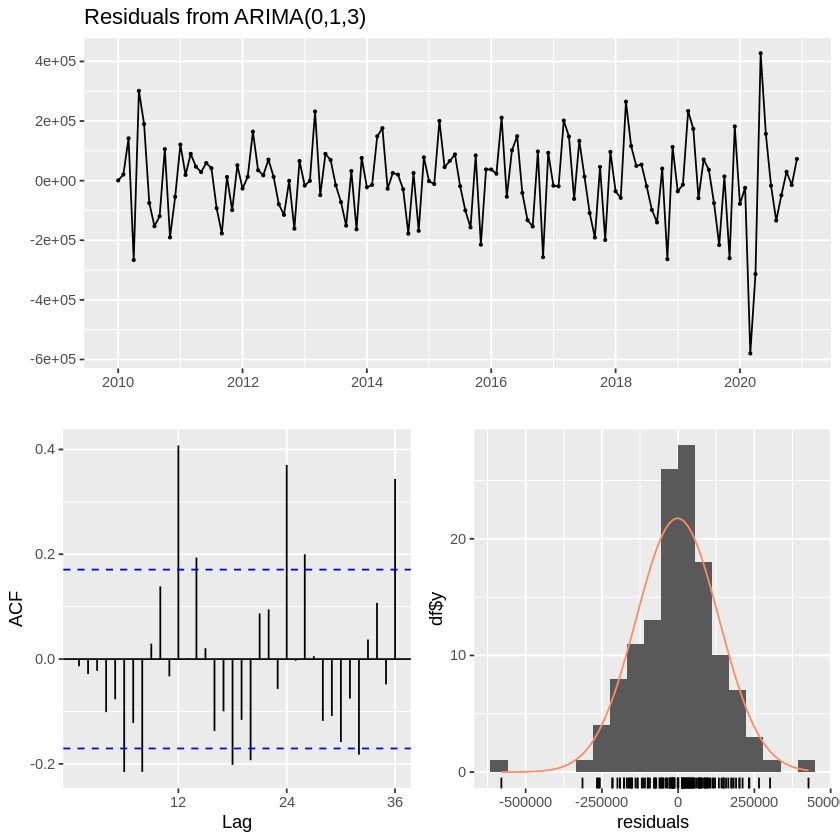

In [50]:
checkresiduals(arimamodel)

Simple Naive Forecasting Model


Forecast method: Seasonal naive method

Model Information:
Call: snaive(y = df1, h = 6) 

Residual sd: 448230.1456 

Error measures:
                    ME     RMSE      MAE       MPE   MAPE MASE      ACF1
Training set -60924.17 448230.1 192899.2 -232.9477 243.34    1 0.9344325

Forecasts:
         Point Forecast       Lo 80   Hi 80     Lo 95     Hi 95
Jan 2021        1183500  609069.955 1757930  304985.1 2062014.9
Feb 2021        1161900  587469.955 1736330  283385.1 2040414.9
Mar 2021         575600    1169.955 1150030 -302914.9 1454114.9
Apr 2021          12800 -561630.045  587230 -865714.9  891314.9
May 2021          24700 -549730.045  599130 -853814.9  903214.9
Jun 2021          53100 -521330.045  627530 -825414.9  931614.9

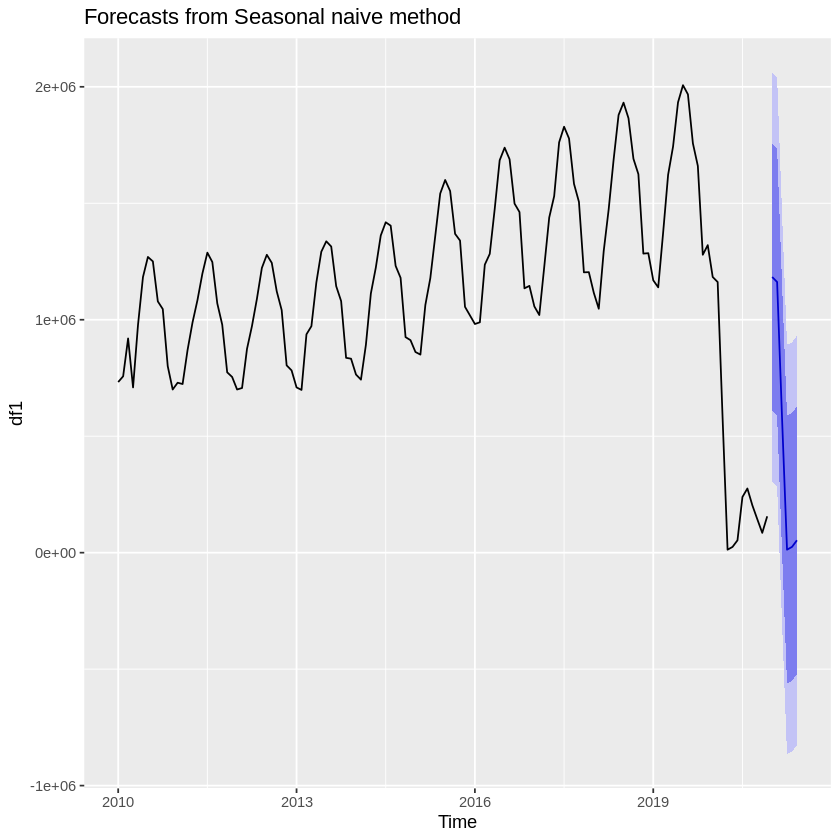

In [51]:
#model,graph and summary
nvmodel<-snaive(df1,h=6)
autoplot(nvmodel)
summary(nvmodel)  


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 361.23, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



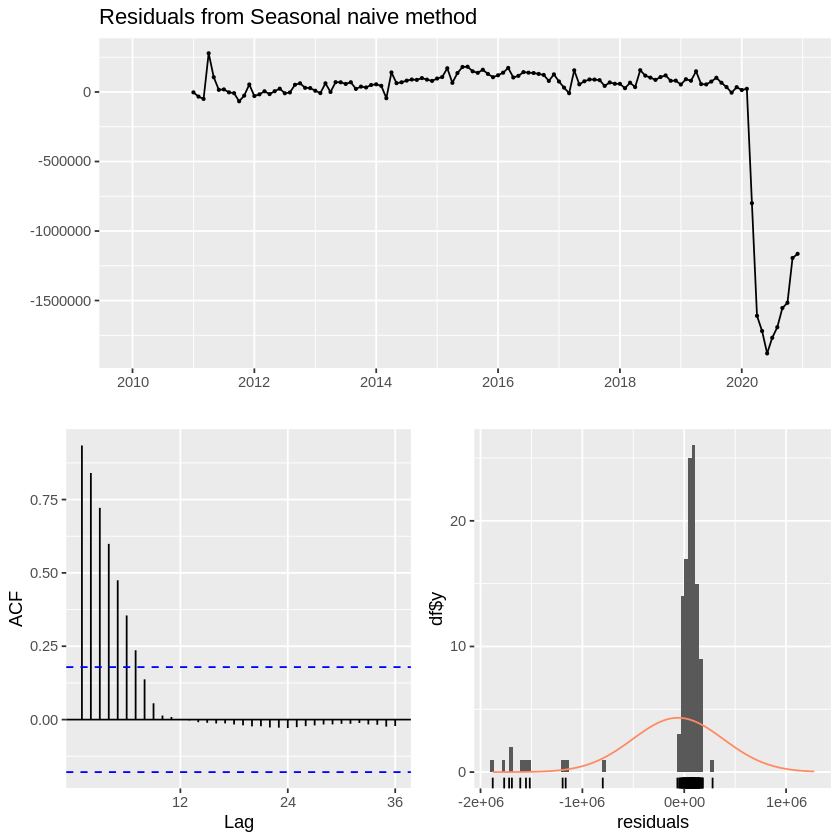

In [52]:
checkresiduals(nvmodel)

**Part2**

In [53]:
#reading bank dataset
df <- read_csv("/content/bank.csv",show_col_types = FALSE)
head(df)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [54]:
#data dimension
dim(df)

[1] 45211    17

In [55]:
#checking for null values
sum(is.na(df))

[1] 0

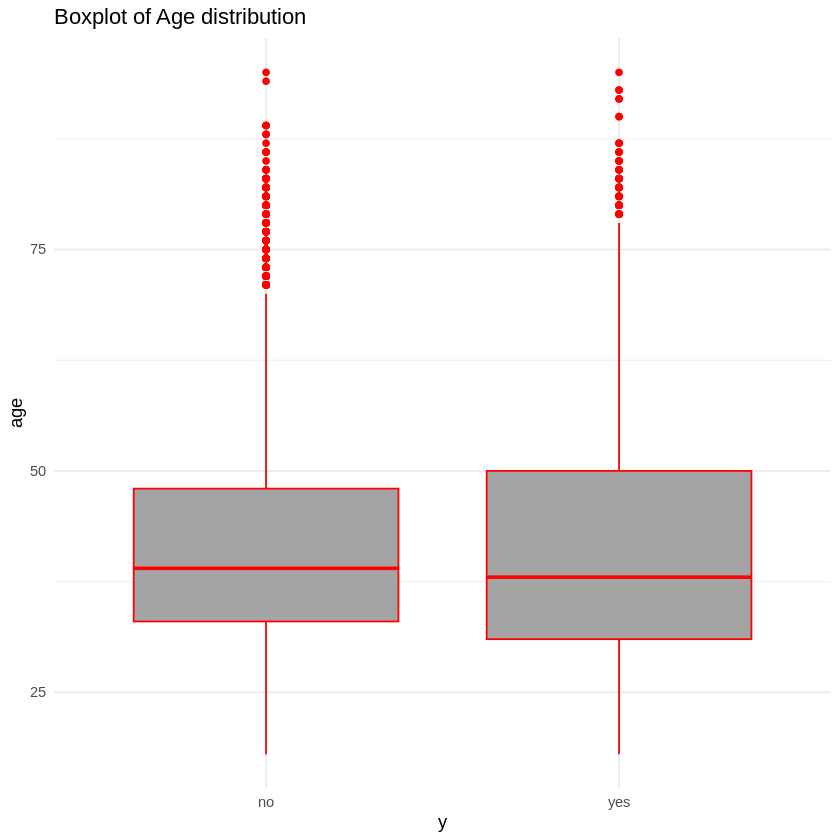

In [56]:
#Age distribution
ggplot(df, aes(x=y,y=age, fill=Profession)) + geom_boxplot(fill='#A4A4A4', color="red") +theme_minimal() +
  labs(title = "Boxplot of Age distribution")

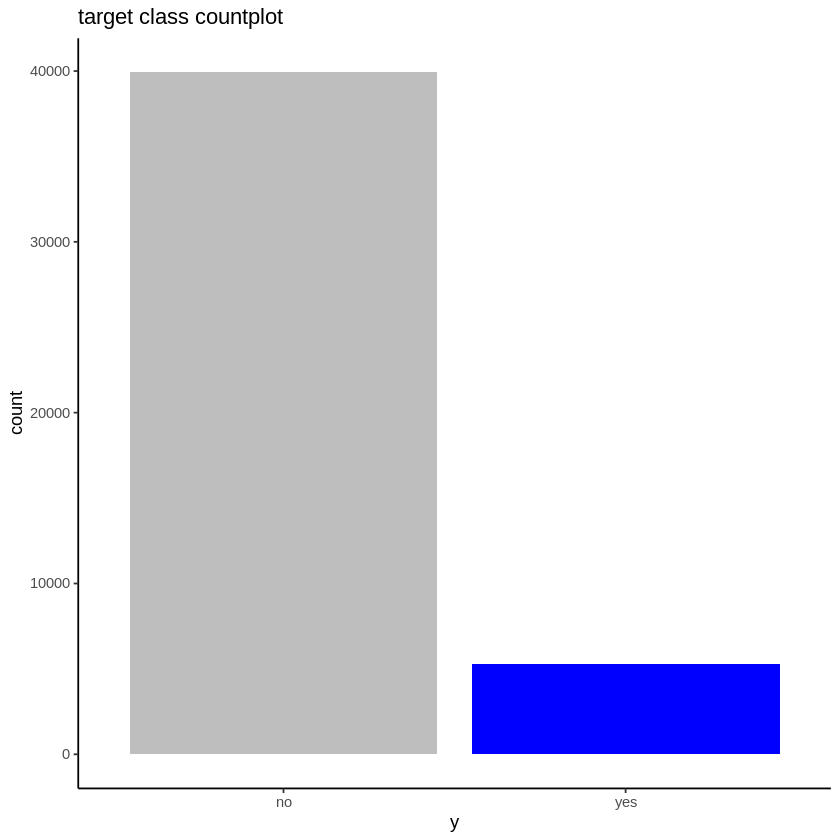

In [57]:
#count plot of target class
ggplot(data=df, aes(x=y))+
  geom_bar( fill=c("gray","blue")) +
  theme_minimal() + 
  theme_classic() +
  labs(title="target class countplot")

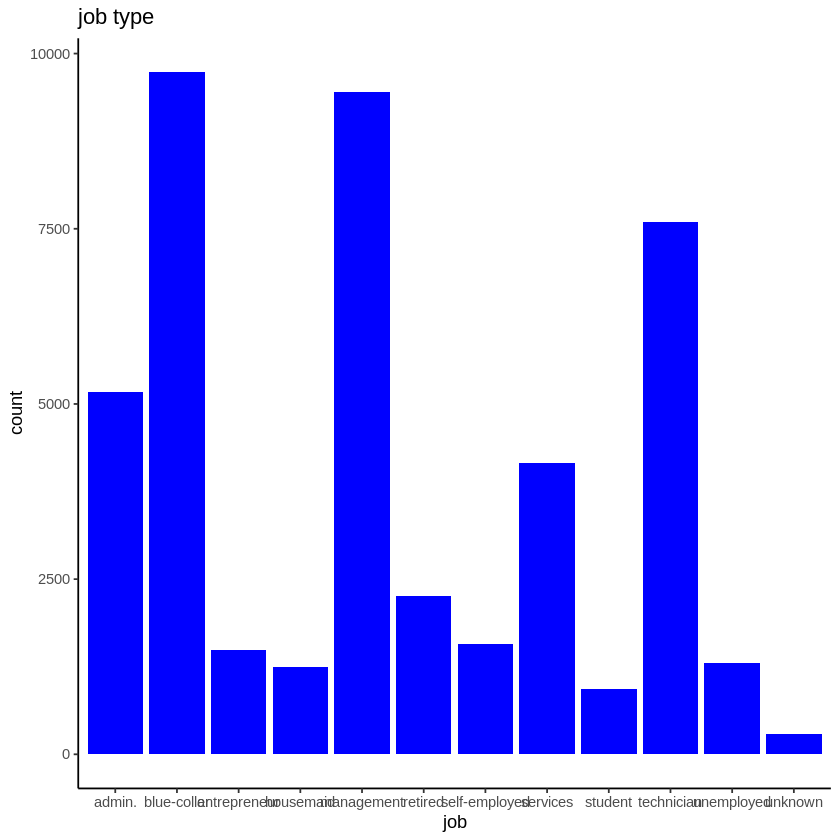

In [58]:
#job category wise count
ggplot(data=df, aes(x=job))+
  geom_bar(fill="blue") +
  theme_minimal() + 
  theme_classic() +
  labs(title="job type")

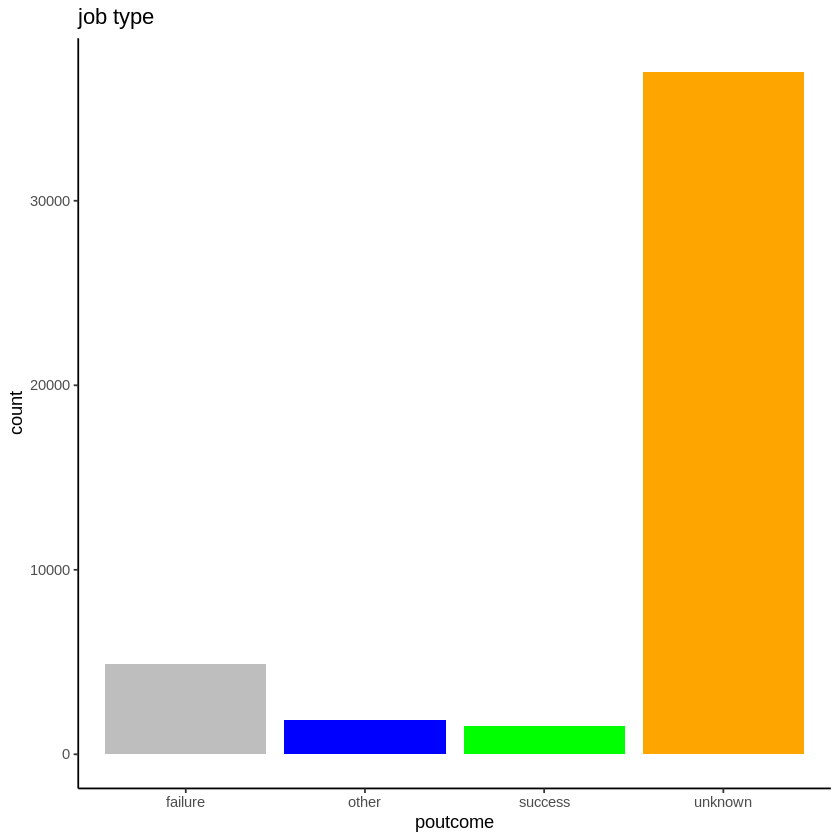

In [59]:
#count plot of poutcome types
ggplot(data=df, aes(x=poutcome))+
  geom_bar(fill=c("gray","blue","green","orange")) +
  theme_minimal() + 
  theme_classic() +
  labs(title="job type")

In [60]:
str(df)

spc_tbl_ [45,211 × 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age      : num [1:45211] 58 44 33 47 33 35 28 42 58 43 ...
 $ job      : chr [1:45211] "management" "technician" "entrepreneur" "blue-collar" ...
 $ marital  : chr [1:45211] "married" "single" "married" "married" ...
 $ education: chr [1:45211] "tertiary" "secondary" "secondary" "unknown" ...
 $ default  : chr [1:45211] "no" "no" "no" "no" ...
 $ balance  : num [1:45211] 2143 29 2 1506 1 ...
 $ housing  : chr [1:45211] "yes" "yes" "yes" "yes" ...
 $ loan     : chr [1:45211] "no" "no" "yes" "no" ...
 $ contact  : chr [1:45211] "unknown" "unknown" "unknown" "unknown" ...
 $ day      : num [1:45211] 5 5 5 5 5 5 5 5 5 5 ...
 $ month    : chr [1:45211] "may" "may" "may" "may" ...
 $ duration : num [1:45211] 261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : num [1:45211] 1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : num [1:45211] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : num [1:45211] 0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome : ch

In [61]:
#Label encoding
cols <- c("job", "marital", "education", "default","housing","loan","contact","month","poutcome")
df[cols] <- lapply(df[cols], factor) 
df[cols] <- sapply(df[cols], unclass)
head(df)


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
58,5,2,3,1,2143,2,1,3,5,9,261,1,-1,0,4,no
44,10,3,2,1,29,2,1,3,5,9,151,1,-1,0,4,no
33,3,2,2,1,2,2,2,3,5,9,76,1,-1,0,4,no
47,2,2,4,1,1506,2,1,3,5,9,92,1,-1,0,4,no
33,12,3,4,1,1,1,1,3,5,9,198,1,-1,0,4,no
35,5,2,3,1,231,2,1,3,5,9,139,1,-1,0,4,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000000,-0.0218679434,-0.403240136,-1.068066e-01,-0.017879304,0.097782739,-0.185513082,-0.015655273,0.02622107,-0.009120046,-0.042357405,-0.004648428,0.004760312,-2.375801e-02,0.0012883192,0.007366903
job,-0.021867943,1.0000000000,0.062045485,1.667067e-01,-0.006853085,0.018231515,-0.125362813,-0.033003921,-0.08206330,0.022855573,-0.092869579,0.004743641,0.006838626,-2.445504e-02,-0.0009106174,0.011010358
marital,-0.403240136,0.0620454852,1.000000000,1.085761e-01,-0.007023365,0.002121918,-0.016095882,-0.046892524,-0.03920142,-0.005261364,-0.006990661,0.011852173,-0.008994100,1.917225e-02,0.0149732426,-0.016850456
education,-0.106806594,0.1667067239,0.108576125,1.000000e+00,-0.010717690,0.064514043,-0.090790237,-0.048573533,-0.11092757,0.022671046,-0.057303833,0.001935105,0.006255137,5.235498e-05,0.0175696313,-0.019361368
default,-0.017879304,-0.0068530852,-0.007023365,-1.071769e-02,1.000000000,-0.066745057,-0.006025218,0.077234241,0.01540414,0.009423899,0.011485783,-0.010021461,0.016821531,-2.997936e-02,-0.0183294048,0.034898194
balance,0.097782739,0.0182315155,0.002121918,6.451404e-02,-0.066745057,1.000000000,-0.068768316,-0.084350246,-0.02727294,0.004502585,0.019777231,0.021560380,-0.014578279,3.435322e-03,0.0166736367,-0.020967337
housing,-0.185513082,-0.1253628132,-0.016095882,-9.079024e-02,-0.006025218,-0.068768316,1.000000000,0.041322866,0.18812289,-0.027981649,0.271480739,0.005075449,-0.023598707,1.241784e-01,0.0370761497,-0.099970667
loan,-0.015655273,-0.0330039210,-0.046892524,-4.857353e-02,0.077234241,-0.084350246,0.041322866,1.000000000,-0.01087301,0.011370158,0.022144853,-0.012411972,0.009979846,-2.275364e-02,-0.0110434883,0.015457767
contact,0.026221067,-0.0820633039,-0.039201423,-1.109276e-01,0.015404140,-0.027272944,0.188122888,-0.010873011,1.00000000,-0.027936231,0.361144884,-0.020839303,0.019614376,-2.448165e-01,-0.1478113997,0.272213798
day,-0.009120046,0.0228555732,-0.005261364,2.267105e-02,0.009423899,0.004502585,-0.027981649,0.011370158,-0.02793623,1.000000000,-0.006027676,-0.030206341,0.162490216,-9.304407e-02,-0.0517104967,0.083459682


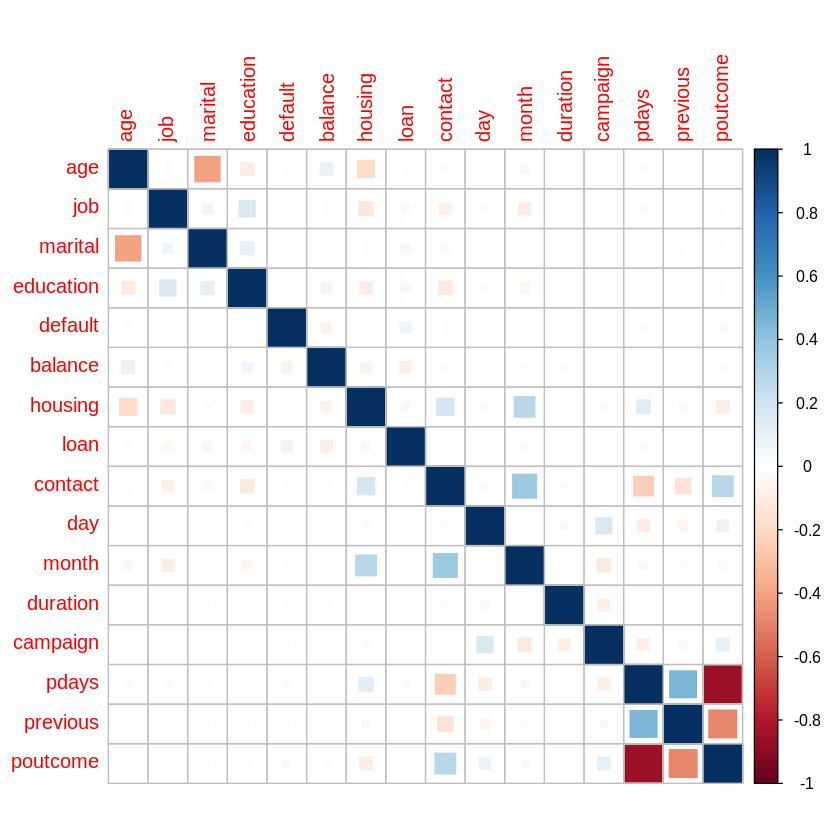

In [62]:
#correlation plot
cor(subset(df, select = -y))
corrplot(cor(subset(df, select = -y)), method="square")

In [63]:
#converting target class to integer
df$y <- ifelse(df$y=="yes",1,0)
df$y <- as.integer(df$y)
df$y <- factor(df$y, levels = c(0, 1))

In [64]:
head(df)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
58,5,2,3,1,2143,2,1,3,5,9,261,1,-1,0,4,0
44,10,3,2,1,29,2,1,3,5,9,151,1,-1,0,4,0
33,3,2,2,1,2,2,2,3,5,9,76,1,-1,0,4,0
47,2,2,4,1,1506,2,1,3,5,9,92,1,-1,0,4,0
33,12,3,4,1,1,1,1,3,5,9,198,1,-1,0,4,0
35,5,2,3,1,231,2,1,3,5,9,139,1,-1,0,4,0


In [65]:
#dimension-reduction using ctree (feature importance)
cf1 <- cforest(y ~ . , data= df, control=cforest_unbiased(mtry=2,ntree=50))

In [66]:
importance =  varimp(cf1)

In [67]:
#top 10 important feature 
order(-importance)[1:10]

[1] 12 14 15 16  7  9 11  1 10  4

In [68]:
df1 <- subset(df,select=c(12,14,16,15,7,11,9,1,10,8,17))

In [69]:
head(df1)

duration,pdays,poutcome,previous,housing,month,contact,age,day,loan,y
<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
261,-1,4,0,2,9,3,58,5,1,0
151,-1,4,0,2,9,3,44,5,1,0
76,-1,4,0,2,9,3,33,5,2,0
92,-1,4,0,2,9,3,47,5,1,0
198,-1,4,0,1,9,3,33,5,1,0
139,-1,4,0,2,9,3,35,5,1,0


In [70]:
set.seed(1234)
#Splitting in 80:20 TRAIN:TEST
split <- sample.split(df1$y, SplitRatio = 0.8)
train <- subset(df1, split == "TRUE")
test <- subset(df1, split == "FALSE")

In [71]:
#Logistic regression Model
logreg <- glm(y~. , data = train , family = 'binomial')

In [72]:
#prediction
result <- predict(logreg, test)

In [73]:
result[result>=0.5] = 1
result[result<0.5] = 0
result

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
   0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
   0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
   0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
   0    0    0    0    0    0    0

In [74]:
table(test$y , result)

   result
       0    1
  0 7888   96
  1  930  128

In [75]:
summary(logreg)


Call:
glm(formula = y ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.1208  -0.4532  -0.2971  -0.1738   3.1431  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.277e-01  1.801e-01  -5.149 2.61e-07 ***
duration     3.935e-03  6.699e-05  58.739  < 2e-16 ***
pdays        3.507e-03  2.839e-04  12.352  < 2e-16 ***
poutcome     1.773e-01  3.241e-02   5.471 4.47e-08 ***
previous     7.444e-02  8.731e-03   8.526  < 2e-16 ***
housing     -1.124e+00  4.203e-02 -26.744  < 2e-16 ***
month        4.487e-02  6.180e-03   7.261 3.84e-13 ***
contact     -6.654e-01  3.010e-02 -22.107  < 2e-16 ***
age          1.700e-03  1.666e-03   1.021    0.307    
day         -1.060e-02  2.301e-03  -4.605 4.12e-06 ***
loan        -7.715e-01  6.323e-02 -12.201  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 261

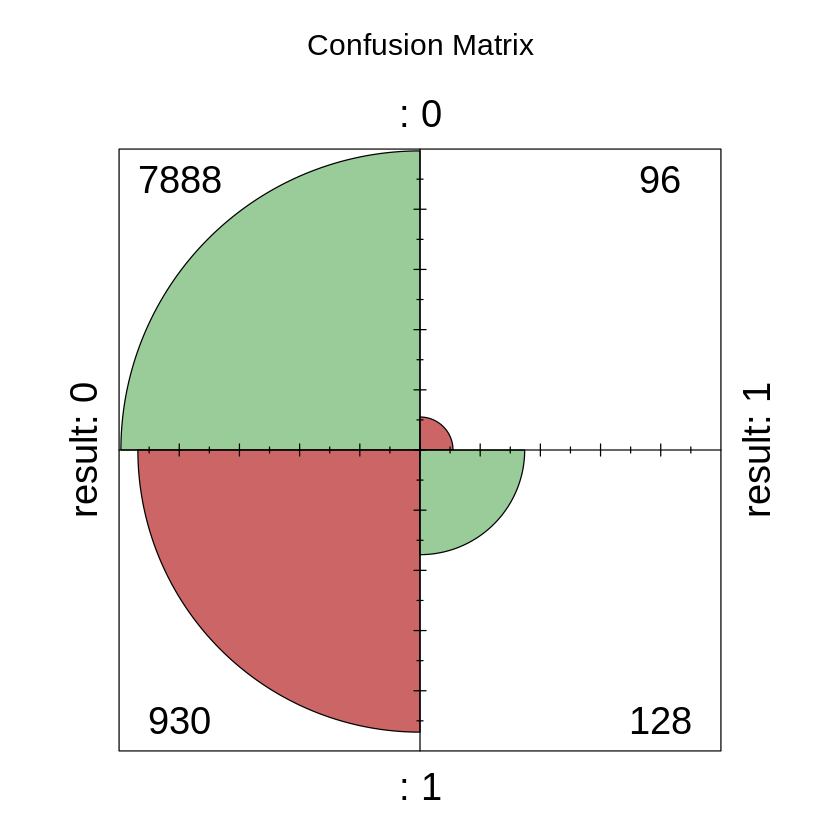

In [76]:
ctable <- table(test$y , result)
fourfoldplot(ctable , color = c("#CC6666", "#99CC99"),
             conf.level = 0, margin = 1, main = "Confusion Matrix")

In [77]:
confusionMatrix(table(test$y , result))

Confusion Matrix and Statistics

   result
       0    1
  0 7888   96
  1  930  128
                                         
               Accuracy : 0.8865         
                 95% CI : (0.8798, 0.893)
    No Information Rate : 0.9752         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1656         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.8945         
            Specificity : 0.5714         
         Pos Pred Value : 0.9880         
         Neg Pred Value : 0.1210         
             Prevalence : 0.9752         
         Detection Rate : 0.8724         
   Detection Prevalence : 0.8830         
      Balanced Accuracy : 0.7330         
                                         
       'Positive' Class : 0              
                                         